# Week 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

## Exercise 1

#### 1.Use the "pima-indians-diabetes.csv" dataset and note down the meta information.
#### 2.Compute mean & standard deviation, tabulate and visualize the age of the patients.
#### 3.Analyze and tabulate the relationship of age, BMI of patients with respect to the class.
#### 4.Tabulate the class label and comment on whether the classes are balanced.
#### 5.Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.
#### 6.Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.
#### 7.Compute accuracy rate, true positive and true negative rate and comment on the performance.
#### 8.Visualize the ROC curve, and comment on the performance of the classifier.

In [2]:
# Question 1
df = pd.read_csv("pima-indians-diabetes.csv")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Mean Age: 33.240885416666664, Standard Deviation of Age: 11.76023154067868


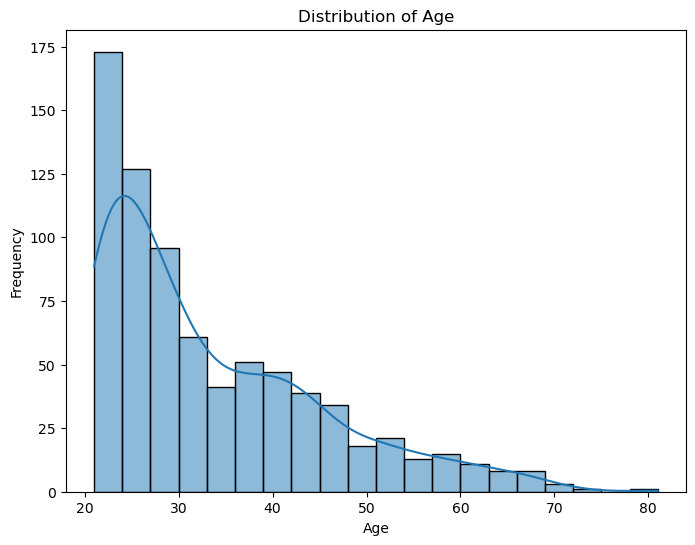

In [4]:
# Question 2
mean_age = df['Age'].mean()
std_age = df['Age'].std()
print(f"Mean Age: {mean_age}, Standard Deviation of Age: {std_age}")


age_stats = pd.DataFrame({'Mean Age': [mean_age], 'Standard Deviation': [std_age]})
age_stats


plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

               Age        BMI
Outcome                      
0        31.190000  30.304200
1        37.067164  35.142537


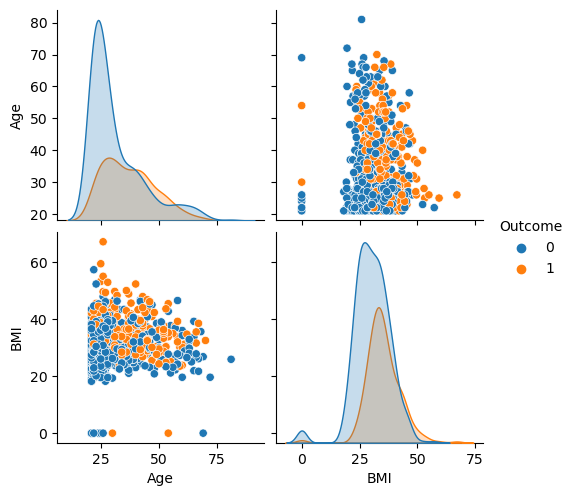

In [5]:
# Question 3

age_bmi_class_stats = df.groupby('Outcome')[['Age', 'BMI']].mean()
print(age_bmi_class_stats)

sns.pairplot(df, vars=['Age', 'BMI'], hue='Outcome')
plt.show()


0    500
1    268
Name: Outcome, dtype: int64


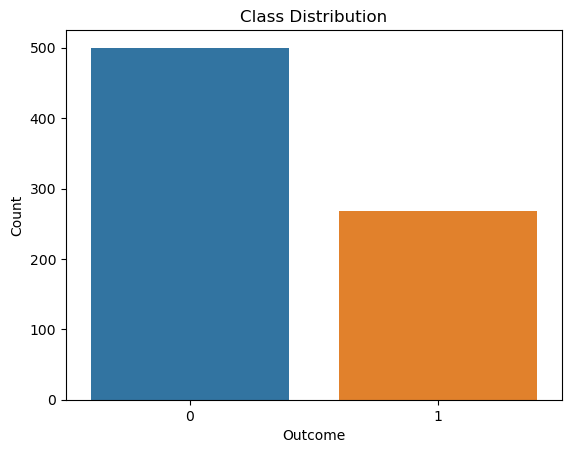

The classes are somewhat imbalanced.(Not to a huge extreme) 


In [6]:
# Question 4
class_distribution = df['Outcome'].value_counts()
print(class_distribution)


sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()
print(f"The classes are somewhat imbalanced.(Not to a huge extreme) ")

In [7]:
# Question 5
X = df.drop('Outcome', axis=1)
Y = df['Outcome']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)

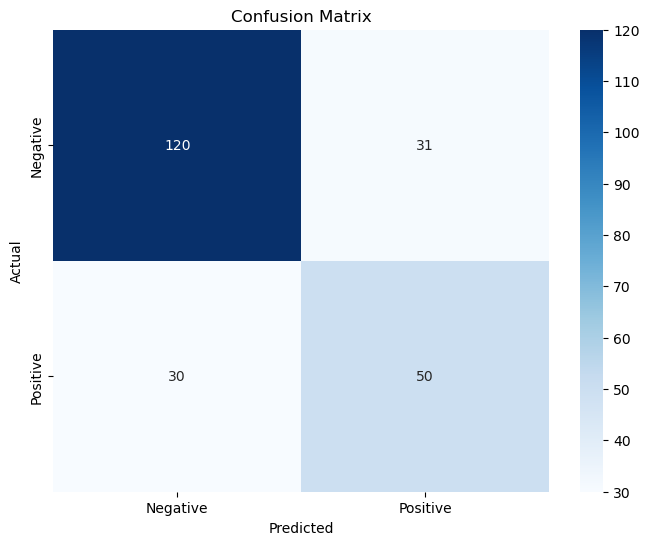

In [8]:
# Question 6
cm = confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# Question 7
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy Rate: {accuracy}")

tpr = recall_score(Y_test, Y_pred)
print(f"True Positive Rate (Sensitivity): {tpr}")

tn = cm[0][0]
fp = cm[0][1]
tnr = tn / (tn + fp)
print(f"True Negative Rate (Specificity): {tnr}")
print("The model performs reasonably well with an accuracy of 73.6%, but it struggles with identifying positive cases, as evidenced by the 62.5% sensitivity. While it has a relatively high specificity of 79.5%, the lower sensitivity indicates room for improvement in capturing more true positives.")

Accuracy Rate: 0.7359307359307359
True Positive Rate (Sensitivity): 0.625
True Negative Rate (Specificity): 0.7947019867549668
The model performs reasonably well with an accuracy of 73.6%, but it struggles with identifying positive cases, as evidenced by the 62.5% sensitivity. While it has a relatively high specificity of 79.5%, the lower sensitivity indicates room for improvement in capturing more true positives.


AUC: 0.7966059602649006


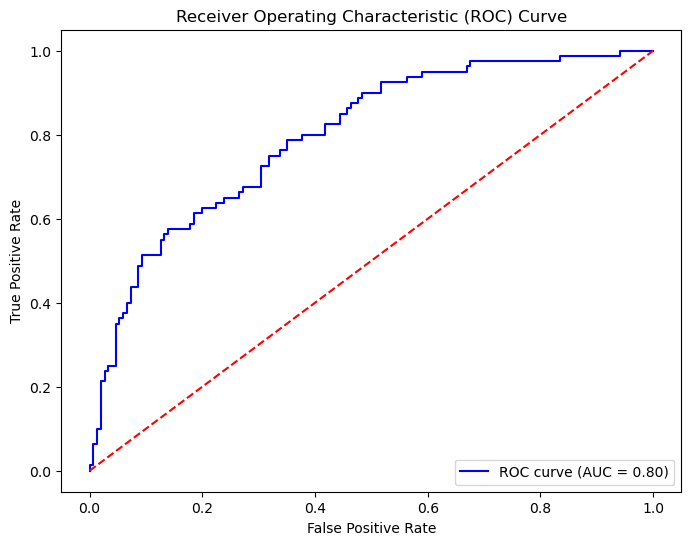

In [21]:
# Question 8
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])

roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## Exercise 2

#### 1.For the IRIS data set write down the meta information. 
#### 2.Visualize the class label against the predictor variable using appropriate plots. 
#### 3.Use the IRIS data set to build a logistic regression model (using sklearn) and predict the 
#### class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.  
#### 4.Analysis and visualize the performance of the classifier using metrics, confusion matrix. 
#### 5.Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 
#### 6.Identify the best k (for k between 2 and 20) for the model built. 
#### 7.Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better performance for the IRIS dataset.

In [11]:
# Question 1
df2 = pd.read_csv("Iris.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


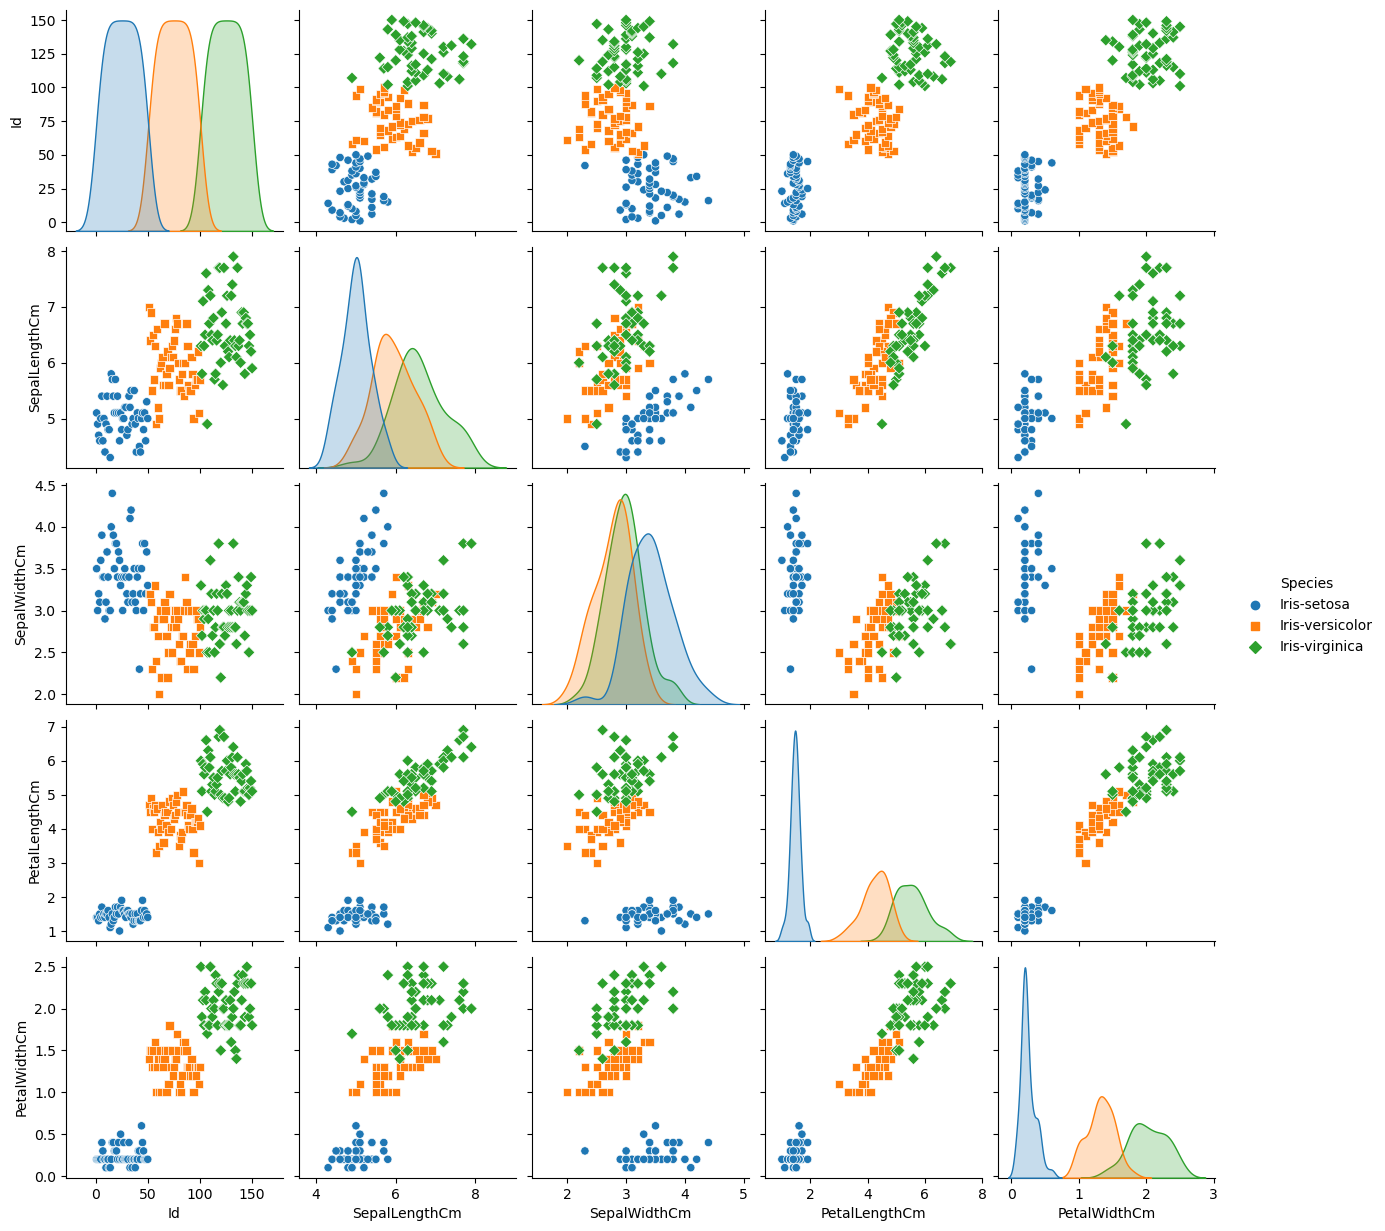

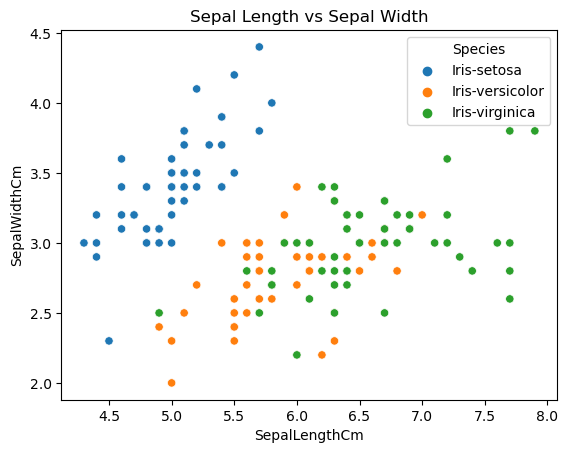

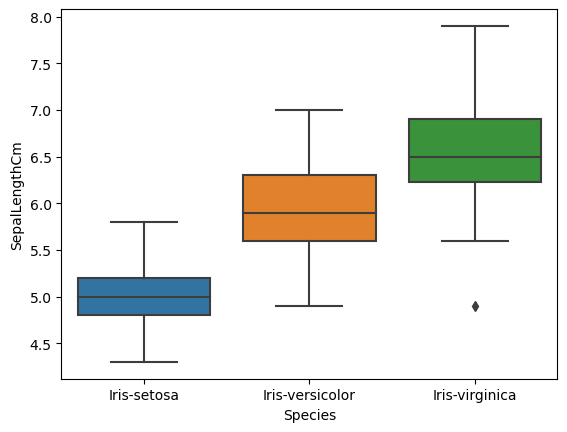

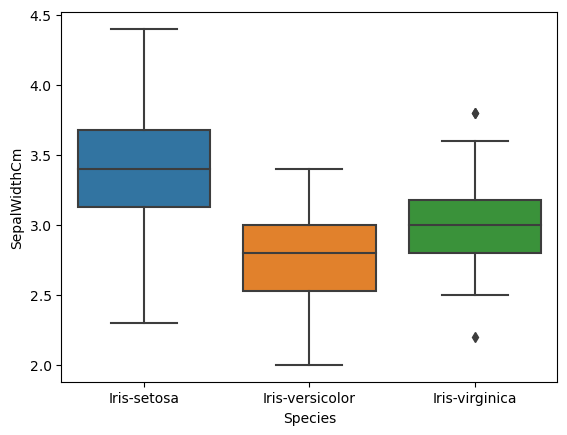

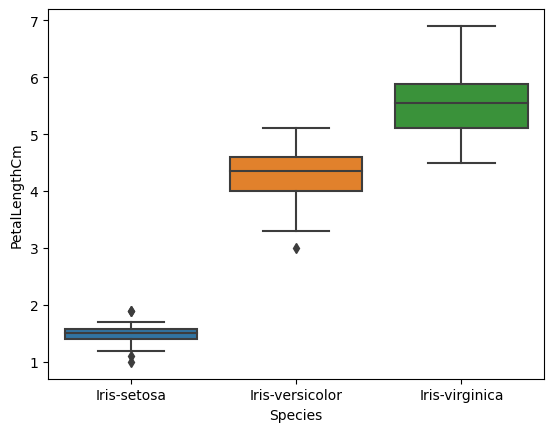

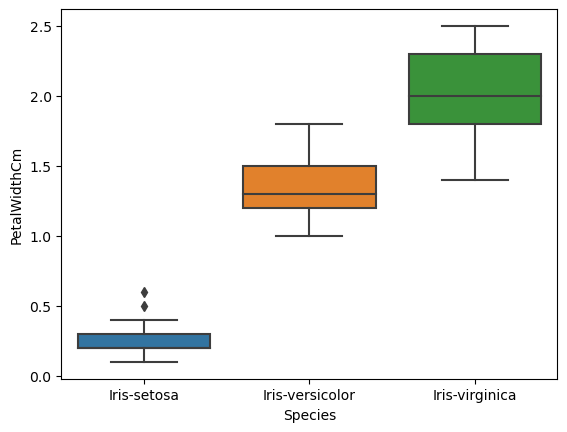

In [14]:
# Question 2
sns.pairplot(df2, hue='Species', markers=["o", "s", "D"])
plt.show()


sns.scatterplot(data=df2, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title("Sepal Length vs Sepal Width")
plt.show()
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df2)
plt.show()
 
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df2)
plt.show()
 
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df2)
plt.show()
 
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df2)
plt.show()

In [15]:
# Question 3
x = df2.drop('Species', axis=1)
y = df2['Species']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(x_train, y_train)


y_pred_logreg = log_reg.predict(x_test)


print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



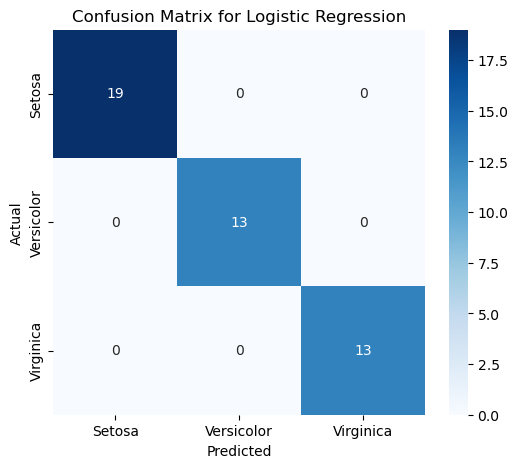

In [16]:
# Question 4
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica']
 , yticklabels=['Setosa', 'Versicolor', 'Virginica']
 )
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

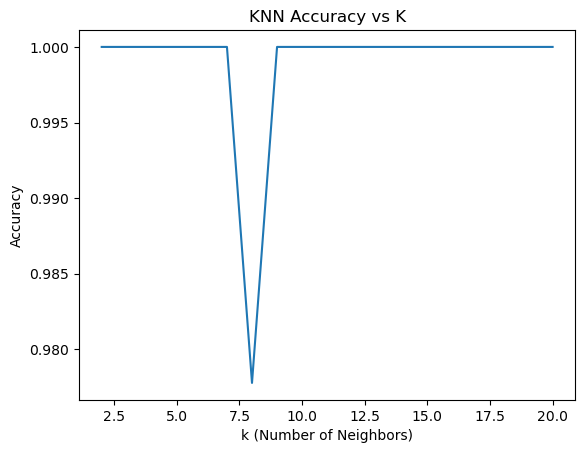

The best k value is 2 with accuracy 1.0


In [17]:
# Question 5
k_range = range(2, 21)
accuracies = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred_knn))


plt.plot(k_range, accuracies)
plt.title("KNN Accuracy vs K")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.show()


best_k = k_range[accuracies.index(max(accuracies))]
print(f"The best k value is {best_k} with accuracy {max(accuracies)}")

The best KNN is KNeighborsClassifier(n_neighbors=2) with the accuracy of 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



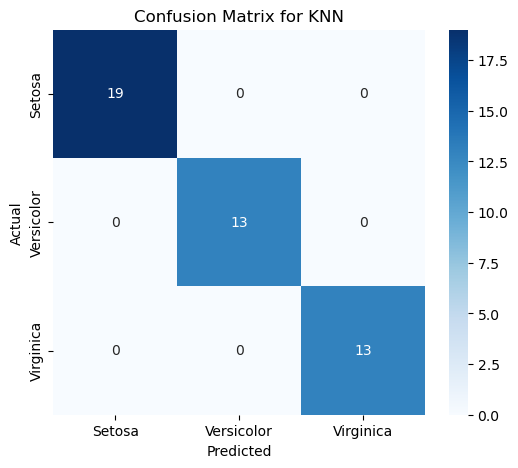

In [18]:
# Question 6

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
y_pred_best_knn = best_knn.predict(x_test)


print(f"The best KNN is {best_knn} with the accuracy of {accuracy_score(y_test, y_pred_best_knn)}")
print(confusion_matrix(y_test, y_pred_best_knn))
print(classification_report(y_test, y_pred_best_knn))

cm_knn = confusion_matrix(y_test, y_pred_best_knn)


plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica']
 , yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [19]:
# Question 7
y_train_pred_logreg = log_reg.predict(x_train)
print(f"Training Accuracy for Logistic Regression: {accuracy_score(y_train, y_train_pred_logreg)}")

y_train_pred_knn = best_knn.predict(x_train)
print(f"Training Accuracy for KNN: {accuracy_score(y_train, y_train_pred_knn)}")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_best_knn))
print("Both the Logistic Regression and K-Nearest Neighbors (KNN) models achieved an accuracy of 100% on the Iris dataset, indicating that the dataset is well-suited for both algorithms. Given the simplicity and well-separated nature of the Iris dataset, both models perform equally well, showing no overfitting. However, to make a more meaningful comparison, further evaluation on more complex or real-world datasets would be necessary to assess the models' generalization capabilities.")

Training Accuracy for Logistic Regression: 1.0
Training Accuracy for KNN: 1.0
Logistic Regression Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

KNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Both the Logistic Regression and K-Nearest Neigh